In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#twitter api req

consumer_key = 'OghYPlGodEcgozxuNVr5c5294'
consumer_secret = 'yHNzTz2WMoFvmMyUYPc5h2xqjn3Rjz1Ryc494gxf5SFwMzFG6F'
access_token = '2408033235-cChNchze46vnUMT97ECabw73MsCWAeUm7vrWslh'
access_token_secret = '3afWisufWn9u9LbMQu6v06XPbUak9DESRGnp3PF4xAZb0'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

#create api obj
api = tweepy.API(auth, wait_on_rate_limit=True)

In [3]:
#extract all tweets form the twitter user

posts = []
for tweet in tweepy.Cursor(api.user_timeline, screen_name="razibKhan", ).items():
    posts.append(tweet)



In [5]:
i = 1
#print tweets
print("Show the tweets:\n")
for tweet in posts:
    print(str(i) + ")" + tweet.text+"\n")
    i += 1

Show the tweets:

1)RT @SteveStuWill: Cuttlefish hypnotizes its prey with its built-in disco lights https://t.co/liCTBcKTK7 https://t.co/z8jaTCrwrX

2)RT @SteveStuWill: Like crows and other corvids, magpies are exceptionally intelligent birds, with cognitive abilities rivalling those of pr…

3)RT @squeeze_camu2: ビートルズがロックファンの一般教養だと思ってた世代には何とも奇妙な、いや感動を追体験出来る素晴らしいリアクションだな、うん☺️

@_romelife
The Beatles - A Day In The Life REACTION THE…

4)Cuttlefish hypnotizes its prey with its built-in disco lights https://t.co/liCTBcKTK7 https://t.co/z8jaTCrwrX

5)Like crows and other corvids, magpies are exceptionally intelligent birds, with cognitive abilities rivalling those… https://t.co/FgvTgjBbHy

6)RT @SteveStuWill: “Few people are capable of expressing with equanimity opinions which differ from the prejudices of their social environme…

7)RT @SteveStuWill: Stunning photograph shows a flower as an insect might see it https://t.co/vVedcmXYrG https://t.co/AlTk8bvPy7

8)“Few people are capable of exp

In [4]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #remove  @mentions
    text = re.sub(r'#', '', text) # remove the '#' symbol
    text = re.sub(r'RT[\s]+', '', text) # remove RT
    text = re.sub(r'https?:\/\/\S+', '', text) #remove the hyper link

    return text

df = pd.DataFrame([tweet.text for tweet in posts], columns=['Tweets'])
df['Tweets'] = df['Tweets'].apply(cleanTxt)
#print
df

,Tweets
0,i think roe overturn in the summer really add...
1,": part 1 on evolution/history of war: ""But fun..."
2,let me be concrete. sometimes groups online d...
3,"it is not ""always"" easy. there are many cases..."
4,sometimes the crowds are being irrational and ...
...,...
549,they are the uberWeiß not unterWeiß
550,just pretend you are the hound of cullen and h...
551,noncollege white men moved to repubs\n\nbut e...
552,not even a reality-based comment. high educat...


In [5]:
keywords = ['evo', 'evolution','ape', 'overproduction', 'adaption', 'organism', 'speciation', 'variation', 'metamorphosis', 'habitat', 'ecosystem', 'ancestor', 'taxonomy', 'taconomic', 'cell', 'inheritance', 'root', 'biology', 'Darwin', 'Natural Selection', 'Origin', 'botanic', 'cholorplast', 'classification', 'clone', 'mutation', 'isolation', 'cytoplasm', 'dna', 'ecology', 'embryo', 'eukaryotic', 'rna', 'fauna', 'flora', 'fetus', 'fossil', 'fungi', 'gene', 'genetic', 'genome', 'dinosour']
evoRTweets = []
i = 0

count = 0
for tweet in df['Tweets']:
    if any(keyword in tweet for keyword in keywords):
        evoRTweets.append(tweet)
        count+=1
    i+=1

dfEvo = pd.DataFrame([item for item in evoRTweets], columns=['Tweets'])

dfEvo


,Tweets
0,": part 1 on evolution/history of war: ""But fun..."
1,Population genomics of a threespine sticklebac...
2,"part 1 on evolution/history of war: ""But funda..."
3,": ""Past brutality and violence likely drove ou..."
4,": ""But fundamentally, the evolutionary and mat..."
...,...
59,: part 2 is incoming tomorrow. it has more stu...
60,"""As our ancestors expanded eastward along the ..."
61,: does an excellent job in balancing summary...
62,part 2 is incoming tomorrow. it has more stuff...


In [6]:
#create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity


#create two new colums
dfEvo['Subjectivity'] = dfEvo['Tweets'].apply(getSubjectivity)
dfEvo['Polarity'] = dfEvo['Tweets'].apply(getPolarity)

#show the new dataframe with new columns
dfEvo


,Tweets,Subjectivity,Polarity
0,": part 1 on evolution/history of war: ""But fun...",0.10000,0.0000
1,Population genomics of a threespine sticklebac...,0.00000,0.0000
2,"part 1 on evolution/history of war: ""But funda...",0.10000,0.0000
3,": ""Past brutality and violence likely drove ou...",0.49375,0.0625
4,": ""But fundamentally, the evolutionary and mat...",0.10000,0.0000
...,...,...,...
59,: part 2 is incoming tomorrow. it has more stu...,0.50000,0.5000
60,"""As our ancestors expanded eastward along the ...",0.00000,0.0000
61,: does an excellent job in balancing summary...,1.00000,1.0000
62,part 2 is incoming tomorrow. it has more stuff...,0.50000,0.5000


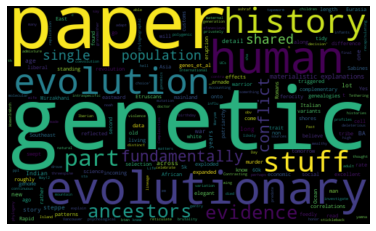

In [7]:
# plot the word cloud

allWords = ' '.join([twts for twts in dfEvo['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [8]:
#create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

dfEvo['Analysis'] = dfEvo['Polarity'].apply(getAnalysis)

#show dataframe
dfEvo

,Tweets,Subjectivity,Polarity,Analysis
0,": part 1 on evolution/history of war: ""But fun...",0.10000,0.0000,Neutral
1,Population genomics of a threespine sticklebac...,0.00000,0.0000,Neutral
2,"part 1 on evolution/history of war: ""But funda...",0.10000,0.0000,Neutral
3,": ""Past brutality and violence likely drove ou...",0.49375,0.0625,Positive
4,": ""But fundamentally, the evolutionary and mat...",0.10000,0.0000,Neutral
...,...,...,...,...
59,: part 2 is incoming tomorrow. it has more stu...,0.50000,0.5000,Positive
60,"""As our ancestors expanded eastward along the ...",0.00000,0.0000,Neutral
61,: does an excellent job in balancing summary...,1.00000,1.0000,Positive
62,part 2 is incoming tomorrow. it has more stuff...,0.50000,0.5000,Positive


In [9]:
#get the percentage of positive tweets
ptweets = dfEvo[dfEvo.Analysis == 'Positive']
ptweets = ptweets['Tweets']


round((ptweets.shape[0] / dfEvo.shape[0])* 100, 1) 

51.6

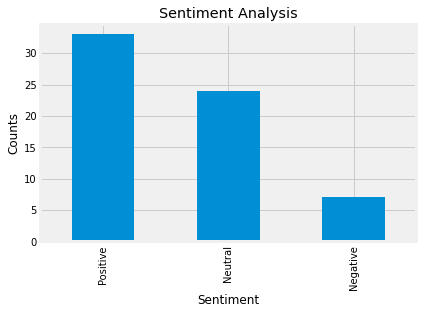

In [10]:
#show the value counts

dfEvo['Analysis'].value_counts()

#plot and visualize the counts

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
dfEvo['Analysis'].value_counts().plot(kind='bar')
plt.show()